## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.


In [4]:
data = pd.read_csv('data_000637.csv')
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0



2\. Find out the number of BX in a ORBIT (the value 'x').


In [5]:
X = max(data['BX_COUNTER']) + 1
print(X)

3564



3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.


In [6]:
orbit_time = X * 25
max_orbit_rows = data.loc[data['ORBIT_CNT'] == data['ORBIT_CNT'].max()]
min_orbit_rows = data.loc[data['ORBIT_CNT'] == data['ORBIT_CNT'].min()]
max_bx_rows = max_orbit_rows.loc[max_orbit_rows['BX_COUNTER'] == max_orbit_rows['BX_COUNTER'].max()]
min_bx_row = min_orbit_rows.loc[min_orbit_rows['BX_COUNTER'] == min_orbit_rows['BX_COUNTER'].min()]
max_tdc_rows = max_bx_rows.loc[max_bx_rows['TDC_MEAS'] == max_bx_rows['TDC_MEAS'].max()]
min_tdc_rows = min_bx_row.loc[min_bx_row['TDC_MEAS'] == min_bx_row['TDC_MEAS'].min()]
print(max_tdc_rows)
print('\n\n')
print(min_tdc_rows)
print('\n\n')
max_tdc_rows = max_tdc_rows.squeeze() #squeeze in this case converts a one row dataframe into a series
min_tdc_rows = min_tdc_rows.squeeze()
max_tdc_row_time = max_tdc_rows['ORBIT_CNT'] * orbit_time + max_tdc_rows['BX_COUNTER'] * 25 + max_tdc_rows['TDC_MEAS'] * (25 / 30)
min_tdc_row_time = min_tdc_rows['ORBIT_CNT'] * orbit_time + min_tdc_rows['BX_COUNTER'] * 25 + min_tdc_rows['TDC_MEAS'] * (25 / 30)
measurement_time = (max_tdc_row_time - min_tdc_row_time) * 1e-9
print(type(max_tdc_row_time))
print(f'The data taking lasted: {measurement_time} seconds')

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
1310718     1     0          139  3869211171         769         0



   HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26



<class 'numpy.float64'>
The data taking lasted: 0.9804162533125 seconds



4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).


In [7]:
data['ABS_TIME'] = (data['ORBIT_CNT'] * orbit_time + data['BX_COUNTER'] * 25 + data['TDC_MEAS'] * (25 / 30) - min_tdc_row_time) * 1e-9
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-10
2,1,0,63,3869200167,2553,28,4.476625e-06
3,1,0,64,3869200167,2558,19,4.594125e-06
4,1,0,64,3869200167,2760,25,9.649125e-06
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e-01
1310716,1,1,4,3869211171,763,11,9.804161e-01
1310717,1,0,64,3869211171,764,0,9.804161e-01
1310718,1,0,139,3869211171,769,0,9.804163e-01


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [17]:
data.loc[:,'HEAD'] = np.random.randint(0,2,np.max(data.index) + 1)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,0.000000e+00
1,0,0,124,3869200167,2374,27,8.125000e-10
2,1,0,63,3869200167,2553,28,4.476625e-06
3,1,0,64,3869200167,2558,19,4.594125e-06
4,1,0,64,3869200167,2760,25,9.649125e-06
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,9.804161e-01
1310716,0,1,4,3869211171,763,11,9.804161e-01
1310717,0,0,64,3869211171,764,0,9.804161e-01
1310718,1,0,139,3869211171,769,0,9.804163e-01


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [9]:
data1 = data[data['HEAD'] == 1]
data1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,0.000000
4,1,0,64,3869200167,2760,25,0.000010
6,1,0,61,3869200167,2772,14,0.000010
9,1,0,60,3869200167,2788,7,0.000010
10,1,1,7,3869200167,2785,4,0.000010
...,...,...,...,...,...,...,...
1310710,1,1,36,3869211171,427,13,0.980408
1310712,1,1,35,3869211171,429,4,0.980408
1310714,1,0,60,3869211171,762,2,0.980416
1310717,1,0,64,3869211171,764,0,0.980416


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

In [18]:
data_fpga_1 = data[data['FPGA'] == 0]
fpga_1_tdc_counts = data_fpga_1['TDC_CHANNEL'].value_counts()
print(fpga_1_tdc_counts)
print(fpga_1_tdc_counts.index)

139    75617
64     64581
63     63724
61     48699
62     48275
       ...  
130       33
137       32
30         4
129        2
39         1
Name: TDC_CHANNEL, Length: 124, dtype: int64
Int64Index([139,  64,  63,  61,  62,  60,  59,  58,  57,  56,
            ...
            107, 106, 103,  67, 138, 130, 137,  30, 129,  39],
           dtype='int64', length=124)


In [11]:
data_fpga_2 = data[data['FPGA'] == 1]
fpga_2_tdc_counts = data_fpga_2['TDC_CHANNEL'].value_counts()

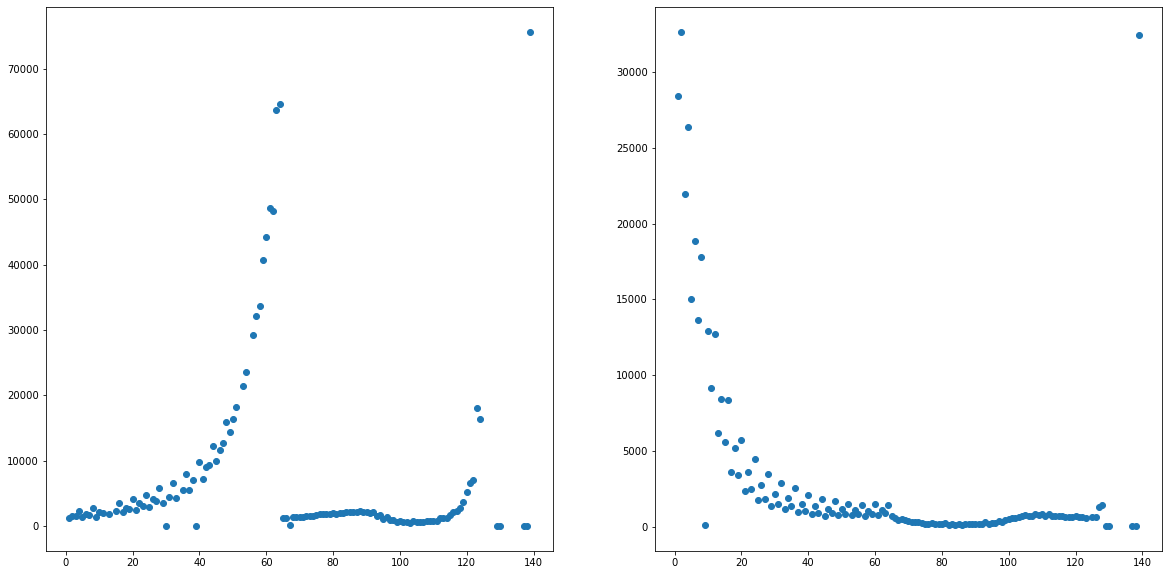

In [12]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].scatter(fpga_1_tdc_counts.index, fpga_1_tdc_counts.values)
ax[1].scatter(fpga_2_tdc_counts.index, fpga_2_tdc_counts.values)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [13]:
fpgas_tdc_nummes_per_channel = data.groupby(['FPGA','TDC_CHANNEL'])['TDC_MEAS'].count()
print(fpgas_tdc_nummes_per_channel[0].nlargest(5))
print(fpgas_tdc_nummes_per_channel[1].nlargest(5))
print(fpgas_tdc_nummes_per_channel.index)

TDC_CHANNEL
139    75617
64     64581
63     63724
61     48699
62     48275
Name: TDC_MEAS, dtype: int64
TDC_CHANNEL
2      32669
139    32442
1      28438
4      26403
3      21970
Name: TDC_MEAS, dtype: int64
MultiIndex([(0,   1),
            (0,   2),
            (0,   3),
            (0,   4),
            (0,   5),
            (0,   6),
            (0,   7),
            (0,   8),
            (0,   9),
            (0,  10),
            ...
            (1, 123),
            (1, 125),
            (1, 126),
            (1, 127),
            (1, 128),
            (1, 129),
            (1, 130),
            (1, 137),
            (1, 138),
            (1, 139)],
           names=['FPGA', 'TDC_CHANNEL'], length=256)


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [14]:
uniq_orbits_num = data['ORBIT_CNT'].value_counts()
uniq_orbits_num

3869208772    351
3869207118    337
3869209661    324
3869206967    322
3869206506    305
             ... 
3869204462      3
3869203571      2
3869205800      2
3869206180      1
3869204142      1
Name: ORBIT_CNT, Length: 11001, dtype: int64

In [15]:
uniq_orbits_ch139 = data.groupby('TDC_CHANNEL')
channel_orbit_counts = []
for channel, frame in iter(uniq_orbits_ch139):
    channel_orbit_counts.append([channel, frame['ORBIT_CNT'].value_counts()])
print(channel_orbit_counts[132])
print(type(channel_orbit_counts[132][1]))


[139, 3869209765    26
3869208086    26
3869207714    25
3869206506    25
3869209671    25
              ..
3869205111     1
3869205161     1
3869203811     1
3869205326     1
3869200685     1
Name: ORBIT_CNT, Length: 10976, dtype: int64]
<class 'pandas.core.series.Series'>


In [16]:
#alternativeli using "normal" functions
data_ch139 = data[data['TDC_CHANNEL'] == 139]
ch139_orbit_counts = data_ch139['ORBIT_CNT'].value_counts()
ch139_orbit_counts

3869209765    26
3869208086    26
3869207714    25
3869206506    25
3869209671    25
              ..
3869205111     1
3869205161     1
3869203811     1
3869205326     1
3869200685     1
Name: ORBIT_CNT, Length: 10976, dtype: int64